In [49]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os
import pandas as pd
from utils import rgbtohex,resizing


In [23]:
def img_color_pallete(original_image, k=8):
    img=resizing(original_image)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    w, h, d = original_shape = tuple(img.shape)
    image_array = np.reshape(img, (w * h, d))
    kmeans = KMeans(n_clusters=k).fit(image_array)
    labels = kmeans.predict(image_array)
    df=pd.DataFrame({"labels":labels})
    label_orders=df['labels'].value_counts().to_dict()
    center_colors = list(kmeans.cluster_centers_)
    colors_ordering=[center_colors[i]/255 for i in label_orders.keys()]
    color_labels = [rgbtohex(colors_ordering[i]*255) for i in label_orders.keys()]
    return img,label_orders,colors_ordering,color_labels

In [50]:
def color_pallet_plot(image,k=8):
    img,label_orders,colors_ordering,color_labels=img_color_pallete(image, k=k)
    plt.figure(figsize=(20, 10))
    plt.subplot(221)
    plt.imshow(img)
    plt.axis('off')
    plt.subplot(222)
    patches, texts =plt.pie(label_orders.values(), colors=colors_ordering, startangle=90)
    plt.legend(patches, color_labels, loc="center right")
    plt.axis('equal')
    plt.savefig(f'images/{image[7:10]}.png')
    plt.show()  

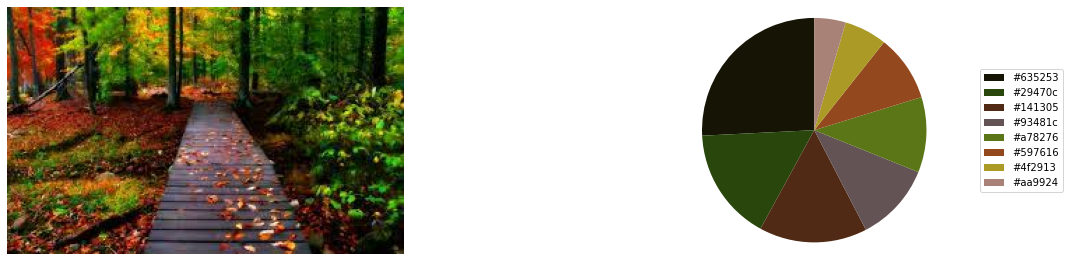

In [44]:
color_pallet_plot(os.path.join('images', 'nature.jpg'),k=8)

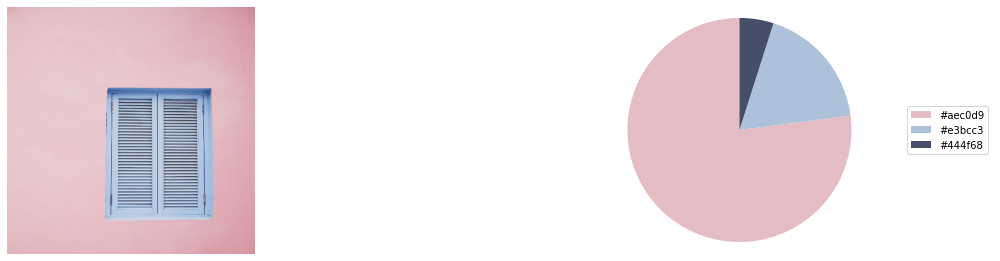

In [51]:
color_pallet_plot(os.path.join('images', 'wall.jpg'),k=3)

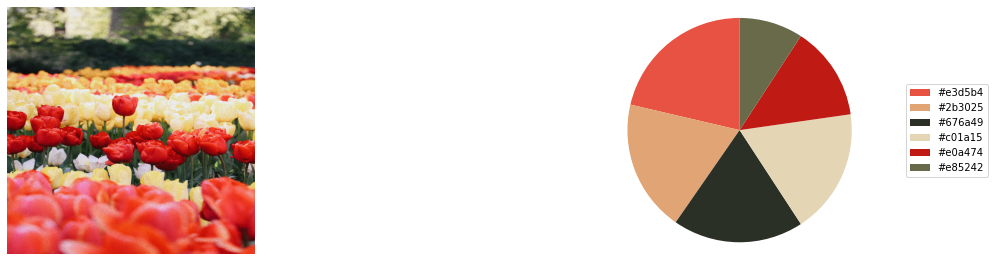

In [52]:
color_pallet_plot(os.path.join('images', 'flower.jpg'),k=6)

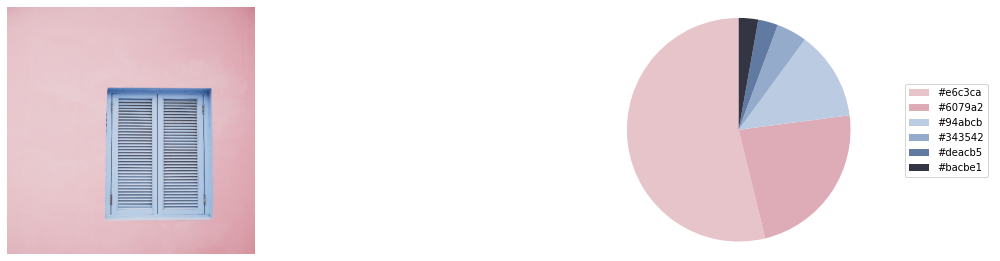

In [53]:
color_pallet_plot(os.path.join('images', 'wall.jpg'),k=6)